In [1]:
import numpy as np
from scipy.spatial.distance import cdist

## 去除孤点

In [32]:

def remove_isopt(A, B, threshold):
    # 计算点集A和点集B之间的距离矩阵
    distances_A = cdist(A, A)
    distances_B = cdist(B, B)
    np.fill_diagonal(distances_A, threshold+10)
    np.fill_diagonal(distances_B, threshold+10)
    # 对点集A进行检查
    indices_to_remove_A = np.where(np.all(distances_A > threshold, axis=1))[0]

    # 对点集B进行检查
    indices_to_remove_B = np.where(np.all(distances_B > threshold, axis=1))[0]
    indices_to_remove = np.union1d(indices_to_remove_A,indices_to_remove_B)
    # 从点集A和点集B中删除对应的点
    print(indices_to_remove_A)
    print(indices_to_remove_B)
    print(indices_to_remove)

    A = np.delete(A, indices_to_remove, axis=0)
    B = np.delete(B, indices_to_remove, axis=0)

    return A, B

# 生成示例数据
A = np.random.randint(0,100, (300, 2))
B = np.random.randint(0,100, (300, 2))

# 设置阈值
threshold = 5

# 删除离群点
A, B = remove_isopt(A, B, threshold)
print(A.shape)
print(B.shape)


[  3   7  24  48  52  59  60  62  66  68  81  83  84  97  99 105 118 124
 134 138 140 148 154 161 165 168 170 181 197 210 213 218 222 224 226 227
 235 239 246 248 263 276 297]
[ 15  30  52  61  66  70  82  85  89  93 113 134 136 147 161 174 185 188
 207 215 223 224 228 247 249 263 265 266 276 286 293]
[  3   7  15  24  30  48  52  59  60  61  62  66  68  70  81  82  83  84
  85  89  93  97  99 105 113 118 124 134 136 138 140 147 148 154 161 165
 168 170 174 181 185 188 197 207 210 213 215 218 222 223 224 226 227 228
 235 239 246 247 248 249 263 265 266 276 286 293 297]
(233, 2)
(233, 2)


## 去除异点（半径内少于5个点不处理）
## (半径内的点映射过去之后的平均中心点)

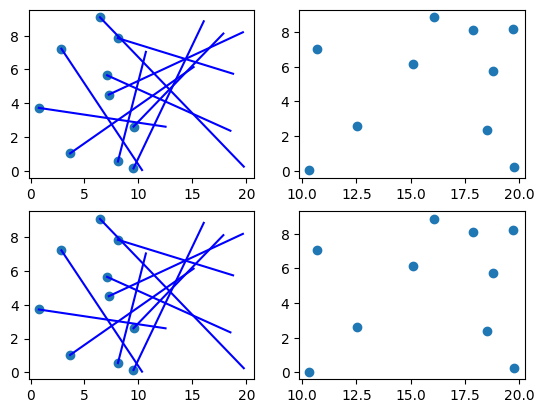

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def calculate_angle(A, B):
    # 计算点集A和B中点的连线与水平线之间的夹角（锐角）
    # _B = B + (480,0)
    diff = B - A
    angle = np.degrees(np.arctan2(diff[:, 1], diff[:, 0]))
    return (angle+360)%180

def remove_outliers(A, B, radius=66, threshold_degrees=30):
    # 计算点对的角度
    angles = calculate_angle(A, B)
    
    # 计算每个点的平均角度值
    average_angle = np.zeros(len(A))
    for i, a in enumerate(A):
        # 找到半径内的所有匹配点
        distances = np.linalg.norm(A - a, axis=1)
        indices_within_radius = np.where(distances <= radius)[0]
        # 半径内没有点：不做处理
        if len(indices_within_radius) <= 5:
            average_angle[i] = angles[i]
        # 半径内有点：取均值
        else:
            average_angle[i] = np.mean(angles[indices_within_radius])
    
    # 找到需要删除的索引
    indices_to_remove = np.where(angles > average_angle + threshold_degrees)[0]
    
    # 从A和B中删除对应的点
    A_filtered = np.delete(A, indices_to_remove, axis=0)
    B_filtered = np.delete(B, indices_to_remove, axis=0)
    
    return A_filtered, B_filtered

# 示例数据
A = np.random.rand(10, 2) * 10
B = np.random.rand(10, 2) * 10
B += (10,0)
# 进行删除操作
A_filtered, B_filtered = remove_outliers(A, B, radius=2, threshold_degrees=10)

fig,ax=plt.subplots(2,2)
ax[0,0].scatter(A[:,0],A[:,1])
ax[0,1].scatter(B[:,0],B[:,1])
ax[1,0].scatter(A_filtered[:,0],A_filtered[:,1])
ax[1,1].scatter(B_filtered[:,0],B_filtered[:,1])
for point1, point2 in zip(A, B):
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    ax[0,0].plot(x, y, 'b-')
for point1, point2 in zip(A_filtered, B_filtered):
    x = [point1[0], point2[0]]
    y = [point1[1], point2[1]]
    ax[1,0].plot(x, y, 'b-')
plt.show()
